In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def check_error(e):
    if e > 0.99:
        return 0.3
    elif e > 0.95:
        return 0.1
    elif e > 0.9:
        return 0.05
    elif e < 0.1:
        return 0.02
    elif e < 0.05:
        return 0.01
    elif e < 0.02:
        return 0.002
    elif e < 0.01:
        return 0.0001
    else:
        return 0.01


In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
df = pd.read_csv("linear_regression_dataset.csv", names = ["x1", "x2", "y"])
data = df[['x1', 'x2','y']].values

epsilon = 1e-15

In [5]:
b = 0.0
total_loss, loss = 0.0, 0.0
lowest_error = float('inf') 
best_w1, best_w2 = None, None

In [6]:
for i in range(5):
    random.seed(i)
    if i == 0:
        w1 = random.uniform(-1,1)
        w2 = random.uniform(-1,1)
    else:
        w1 = random.uniform(best_w1-0.0001*best_w1,best_w1+0.0001*best_w1)
        w2 = random.uniform(best_w2-0.0001*best_w2,best_w2+0.0001*best_w2)

    loss_list = []
    for epoch in range(60):
        initial_lr = 0.01
        decay = 0.01
        learning_rate = initial_lr / (1 + decay * epoch)
        total_loss = 0.0
        for x1,x2,result in data:
            A = x1*w1 + x2*w2 + b
            overall_error = (result - A)
            #A = sigmoid(A)
            learning_rate = check_error(overall_error)
            error = abs(overall_error)
            if error < lowest_error:
                lowest_error = error
                best_w1, best_w2 = w1, w2
            
            if A != result:
                A = np.clip(A,epsilon,1-epsilon)
                loss = overall_error ** 2
                prev_total_loss = total_loss
                total_loss += loss
            else:
                loss = 0.0
                total_loss += loss

            dW1 = x1*overall_error
            dW2 = x2*overall_error
            dB = overall_error
            w1 += learning_rate * dW1
            w2 += learning_rate * dW2
            b += learning_rate * dB
        
        loss_list.append(round(total_loss,2))
        print(f"Epoch {epoch} completed. Loss = {loss_list}")
        print(f"w1 = {best_w1},w2 = {best_w2}")
    print("\n"+"-"*50+"\n")

Epoch 0 completed. Loss = [1.88]
w1 = 0.6976654332992259,w2 = 0.5299757015365278
Epoch 1 completed. Loss = [1.88, 1.52]
w1 = 0.6976654332992259,w2 = 0.5299757015365278
Epoch 2 completed. Loss = [1.88, 1.52, 1.32]
w1 = 0.6976654332992259,w2 = 0.5299757015365278
Epoch 3 completed. Loss = [1.88, 1.52, 1.32, 1.18]
w1 = 0.6522608182271409,w2 = 0.4782784230377369
Epoch 4 completed. Loss = [1.88, 1.52, 1.32, 1.18, 1.06]
w1 = 0.6522608182271409,w2 = 0.4782784230377369
Epoch 5 completed. Loss = [1.88, 1.52, 1.32, 1.18, 1.06, 0.95]
w1 = 0.6522608182271409,w2 = 0.4782784230377369
Epoch 6 completed. Loss = [1.88, 1.52, 1.32, 1.18, 1.06, 0.95, 0.85]
w1 = 0.6522608182271409,w2 = 0.4782784230377369
Epoch 7 completed. Loss = [1.88, 1.52, 1.32, 1.18, 1.06, 0.95, 0.85, 0.76]
w1 = 0.601206414234835,w2 = 0.4080440042630983
Epoch 8 completed. Loss = [1.88, 1.52, 1.32, 1.18, 1.06, 0.95, 0.85, 0.76, 0.67]
w1 = 0.601206414234835,w2 = 0.4080440042630983
Epoch 9 completed. Loss = [1.88, 1.52, 1.32, 1.18, 1.06, 

In [7]:
dW1,dW2,dB

(2.1106123260228314e-08, 2.713644419172212e-08, 3.015160465746902e-08)

In [8]:
best_w1,best_w2,b

(0.299999894148567, 0.1999999634754908, 0.4000000589858387)

In [9]:
df = pd.read_csv("test_model.csv")
data = df[['x1', 'x2', 'y']].values

In [10]:
total_diff = 0.0

In [11]:
diff = []
for x1,x2,y in data:
    A = x1*best_w1 + x2*best_w2 + b
    diff.append(y / A *100)
    print(f"Actual = {y}, Predicted = {A}")
total_diff = np.mean(np.abs(diff))
print(total_diff)

Actual = 0.64, Predicted = 0.6399999743046922
Actual = 0.66, Predicted = 0.6599999706522414
Actual = 0.68, Predicted = 0.6799999669997905
Actual = 0.7, Predicted = 0.6999999633473395
Actual = 0.72, Predicted = 0.7199999596948886
Actual = 0.74, Predicted = 0.7399999560424377
Actual = 0.76, Predicted = 0.7599999523899867
Actual = 0.78, Predicted = 0.7799999487375358
Actual = 0.8, Predicted = 0.7999999450850849
Actual = 0.82, Predicted = 0.819999941432634
Actual = 0.67, Predicted = 0.669999963719549
Actual = 0.69, Predicted = 0.6899999600670981
Actual = 0.71, Predicted = 0.7099999564146471
Actual = 0.73, Predicted = 0.7299999527621962
Actual = 0.75, Predicted = 0.7499999491097453
Actual = 0.77, Predicted = 0.7699999454572943
Actual = 0.79, Predicted = 0.7899999418048435
Actual = 0.81, Predicted = 0.8099999381523925
Actual = 0.83, Predicted = 0.8299999344999416
Actual = 0.85, Predicted = 0.8499999308474907
100.00000628210583


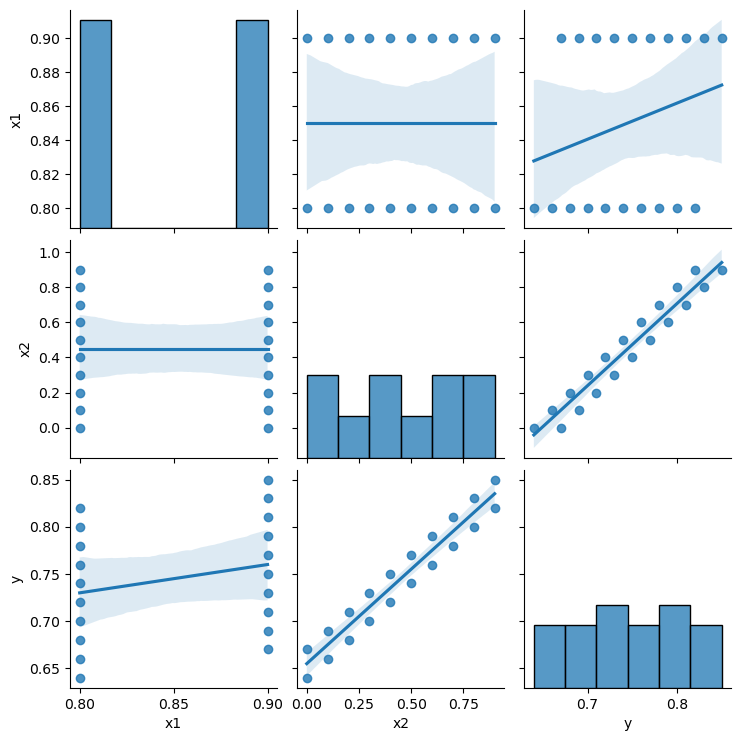

In [19]:
sns.pairplot(df, kind = "reg")
plt.show()